# 1. Read and display data

Used dataset (already converted dataset into csv): https://www.kaggle.com/datasets/oddrationale/mnist-in-csv/code?datasetId=27352&sortBy=voteCount

Original dataset: https://yann.lecun.com/exdb/mnist/

In [1]:
import pandas as pd 

test_data_path = r"data/mnist_test.csv"
train_data_path = r"data/mnist_train.csv"

test_data = pd.read_csv(test_data_path)
train_data = pd.read_csv(train_data_path)

train_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
train_data.shape

(60000, 785)

In [3]:
train_data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
label,60000.0,4.453933,2.88927,0.0,2.0,4.0,7.0,9.0
1x1,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x2,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x3,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1x4,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


In [4]:
print("Min value: ", max(train_data.describe().T["max"]),"\nMax value: ", min(train_data.describe().T["max"]))

Min value:  255.0 
Max value:  0.0


There are a total of 785 columns: 
- one label column describing the number which should be displayed 
- 28x28=784 columns with values betweed 0 and 255 to descibe every pixel of the photo 

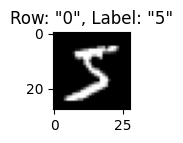

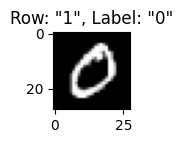

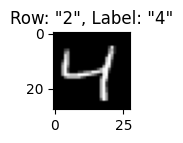

In [5]:
from helper_functions import mnist_csv_plot_number

mnist_csv_plot_number(df=train_data, index=0, count=2, figszie=(1,1))

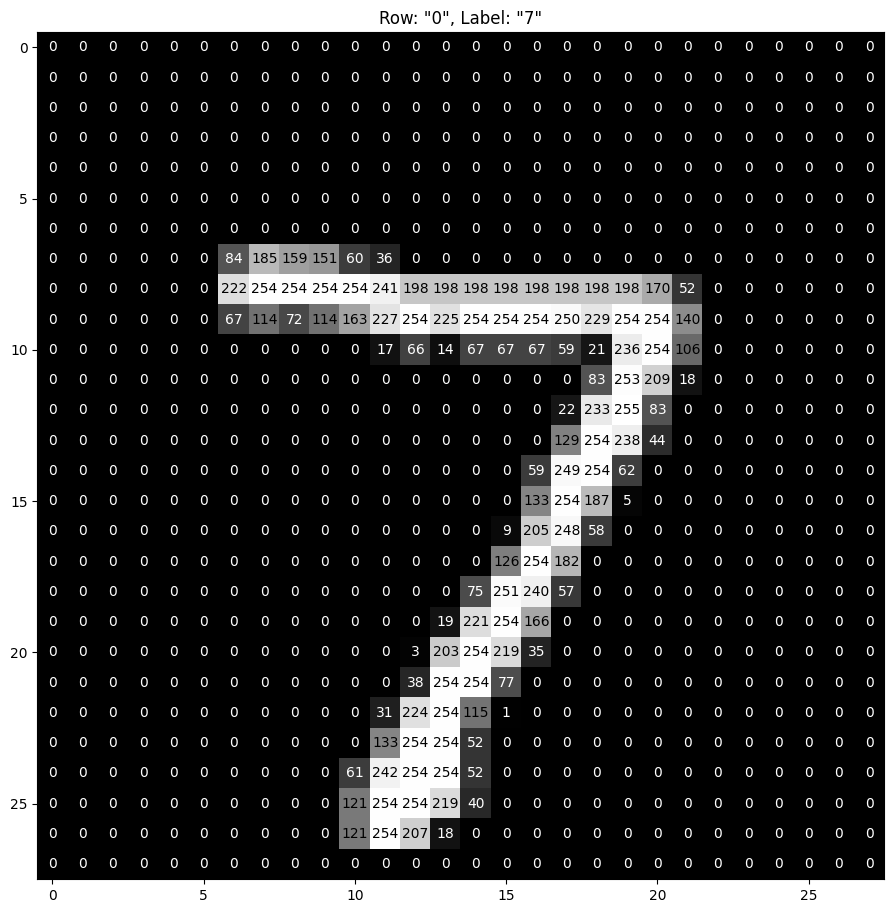

In [6]:
from helper_functions import mnist_csv_plot_number_canvas

mnist_csv_plot_number_canvas(df=test_data)

# 2. Model

In [8]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

ModuleNotFoundError: No module named 'torch'